In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
# Carregando o conjunto de dados
data = pd.read_csv("winequality-white.csv", sep=";")

# Drop da coluna 'quality'
data = data.drop('quality', axis=1)

In [3]:
# Separar os dados em treinamento (75%) e teste (25%)
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

In [4]:
# Estatísticas descritivas para o conjunto de dados original
print("Estatísticas Descritivas para o Conjunto de Dados Original:")
print(data.describe())

# Estatísticas descritivas para o conjunto de treinamento
print("\nEstatísticas Descritivas para o Conjunto de Treinamento:")
print(train_data.describe())

# Estatísticas descritivas para o conjunto de teste
print("\nEstatísticas Descritivas para o Conjunto de Teste:")
print(test_data.describe())


Estatísticas Descritivas para o Conjunto de Dados Original:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     

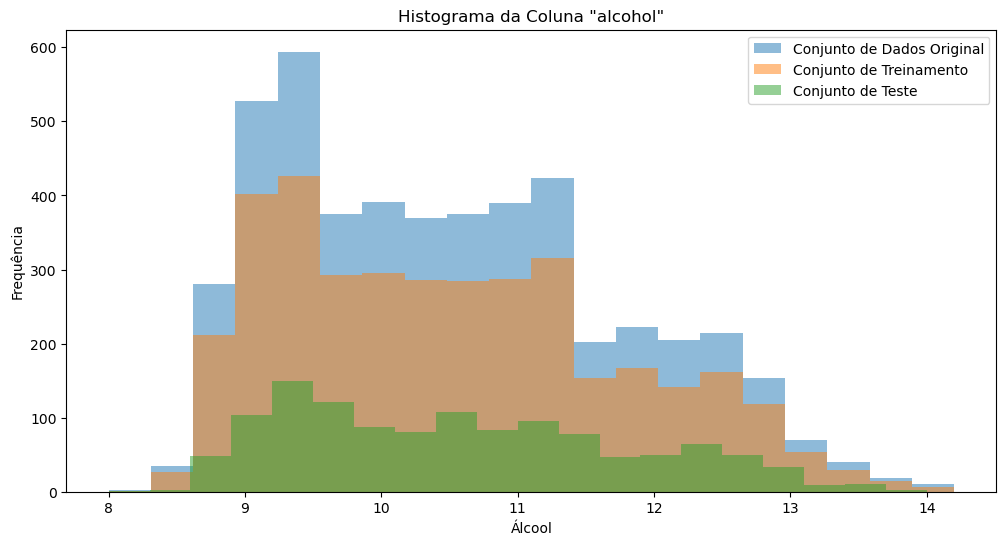

In [5]:
# Histograma para a coluna 'alcohol' no conjunto de dados original
plt.figure(figsize=(12, 6))
plt.hist(data['alcohol'], bins=20, alpha=0.5, label='Conjunto de Dados Original')
plt.hist(train_data['alcohol'], bins=20, alpha=0.5, label='Conjunto de Treinamento')
plt.hist(test_data['alcohol'], bins=20, alpha=0.5, label='Conjunto de Teste')
plt.xlabel('Álcool')
plt.ylabel('Frequência')
plt.legend()
plt.title('Histograma da Coluna "alcohol"')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# Inicializar o scaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformá-los
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

In [7]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Determinar o número ótimo de componentes usando validação cruzada
num_components_list = list(range(1, 12))  # Experimente diferentes números de componentes
cv_rmse_scores = []

for n in num_components_list:
    pca = PCA(n_components=n)
    pca.fit(train_data_normalized)
    train_data_pca = pca.transform(train_data_normalized)
    
    # Criar um modelo de regressão linear
    model = LinearRegression()
    
    # Realizar validação cruzada com 5 dobras
    cv_scores = cross_val_score(model, train_data_pca, train_data['alcohol'], cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores.append((-1 * cv_scores.mean()) ** 0.5)

# Encontrar o número ótimo de componentes com o menor RMSE
optimal_num_components = num_components_list[cv_rmse_scores.index(min(cv_rmse_scores))]

# Criar um modelo final com o número ótimo de componentes
pca = PCA(n_components=optimal_num_components)
pca.fit(train_data_normalized)
train_data_pca = pca.transform(train_data_normalized)
test_data_pca = pca.transform(test_data_normalized)

model = LinearRegression()
model.fit(train_data_pca, train_data['alcohol'])

# Prever 'alcohol' no conjunto de teste
predictions = model.predict(test_data_pca)

# Calcular RMSE e R2 no conjunto de teste
rmse = mean_squared_error(test_data['alcohol'], predictions, squared=False)
r2 = r2_score(test_data['alcohol'], predictions)

print(f"Número ótimo de componentes: {optimal_num_components}")
print(f"RMSE no conjunto de teste: {rmse}")
print(f"R2 no conjunto de teste: {r2}")


Número ótimo de componentes: 11
RMSE no conjunto de teste: 1.5667821620859135e-15
R2 no conjunto de teste: 1.0


In [9]:
# Reduzir a dimensionalidade para o número ótimo de componentes
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(train_data_scaled)
X_test_pca = pca.transform(test_data_scaled)

# Treinar o modelo final de regressão linear
final_model = LinearRegression()
final_model.fit(X_train_pca, train_data['alcohol'])

# Prever os valores no conjunto de teste
y_pred = final_model.predict(X_test_pca)

# Calcular RMSE e R2 no conjunto de teste
rmse_test = np.sqrt(mean_squared_error(test_data['alcohol'], y_pred))
r2_test = r2_score(test_data['alcohol'], y_pred)

# Relatar os resultados
print(f"RMSE no Conjunto de Teste: {rmse_test:.4f}")
print(f"R2 no Conjunto de Teste: {r2_test:.4f}")


RMSE no Conjunto de Teste: 0.0526
R2 no Conjunto de Teste: 0.9982


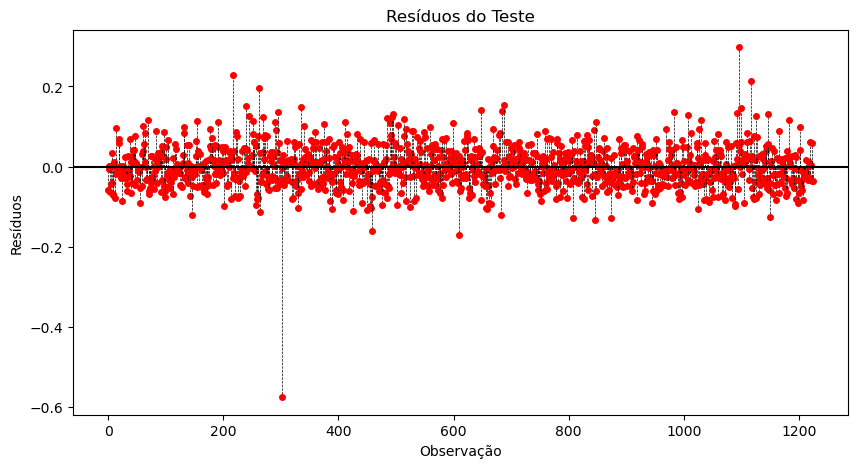

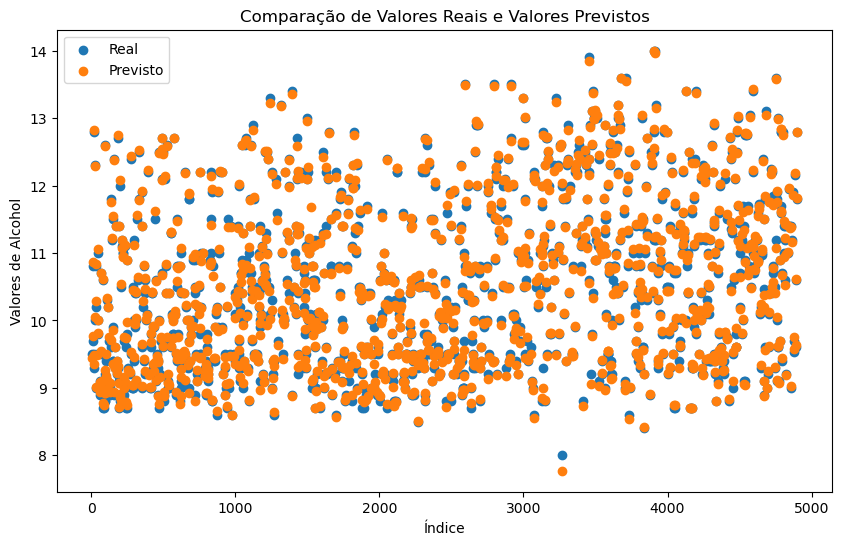

In [10]:
# Gráfico adicional de Resíduos
residuals = test_data['alcohol'] - y_pred
fig, ax = plt.subplots(figsize=(10, 5))
for i, residual in enumerate(residuals):
    ax.plot([i, i], [0, residual], color='black', linestyle='--', linewidth=0.5)
    ax.plot(i, residual, marker='o', markersize=4, color='red')
ax.axhline(y=0, color='black', linestyle='-')
ax.set_xlabel('Observação')
ax.set_ylabel('Resíduos')
ax.set_title('Resíduos do Teste')
plt.show()

# Gráfico adicional de Comparação de Valores Reais e Valores Previstos
y_test = test_data['alcohol']
test_predictions = final_model.predict(X_test_pca)

plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Real')
plt.scatter(y_test.index, test_predictions, label='Previsto')
plt.legend()
plt.title('Comparação de Valores Reais e Valores Previstos')
plt.xlabel('Índice')
plt.ylabel('Valores de Alcohol')
plt.show()